In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from sklearn.metrics import roc_curve, auc

In [2]:
from helpful_functions import generate_data, encode_columns, plot_corr, distance_beetween_two_matrix, tsne_visualization, evaluate

/home/datalab/miniconda3/envs/sergei_chirkov/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Prepare data: CMC

In [3]:
orig_data = pd.read_csv("cmc.data")
print(orig_data.shape)
orig_data.head()


(1472, 10)


,24,2,3,3.1,1,1.1,2.1,3.2,0,1.2
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


In [4]:
metadata_cmc = {'fields':
                    {
                      '24': {'type': 'numerical', 'subtype': 'integer'},
                      '2': {'type': 'categorical'},
                      '3': {'type': 'categorical'},
                      '3.1': {'type': 'numerical', 'subtype': 'integer'},
                      '1': {'type': 'boolean'},
                      '1.1': {'type': 'boolean'},
                      '2.1': {'type': 'categorical'},
                      '3.2': {'type': 'categorical'},
                      '0': {'type': 'boolean'},
                      '1.2': {'type': 'categorical'}
                    }}

categorical_cols = ['2', '3', '2.1', '3.2', '1.2']

# CTGAN

In [5]:
synt_data = generate_data(orig_data, "CTGAN", 1472)

In [6]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(orig_data, synt_data, metadata_cmc)
report.get_details(property_name='Column Shapes')

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.04it/s]



Overall Quality Score: 81.49%

Properties:
Column Shapes: 85.86%
Column Pair Trends: 77.13%


,Column,Metric,Quality Score
0,24,KSComplement,0.924592
1,3.1,KSComplement,0.887228
2,2,TVComplement,0.779891
3,3,TVComplement,0.775136
4,1,TVComplement,0.903533
5,1.1,TVComplement,0.906250
6,2.1,TVComplement,0.820652
7,3.2,TVComplement,0.788723
8,0,TVComplement,0.841712
9,1.2,TVComplement,0.957880


In [7]:
encoded_orig_data = encode_columns(orig_data, categorical_cols)
encoded_synt_data = encode_columns(synt_data, categorical_cols)


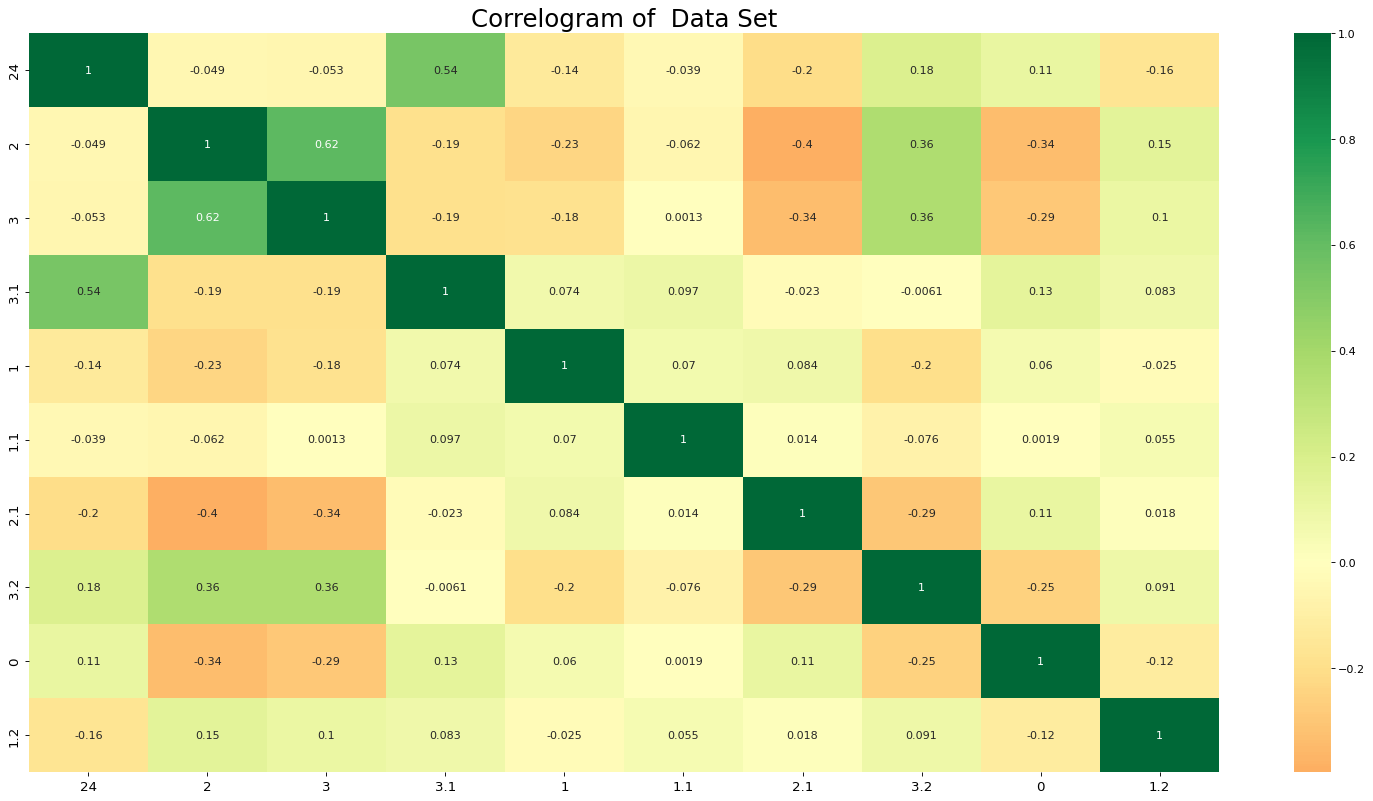

In [8]:
plot_corr(encoded_orig_data)

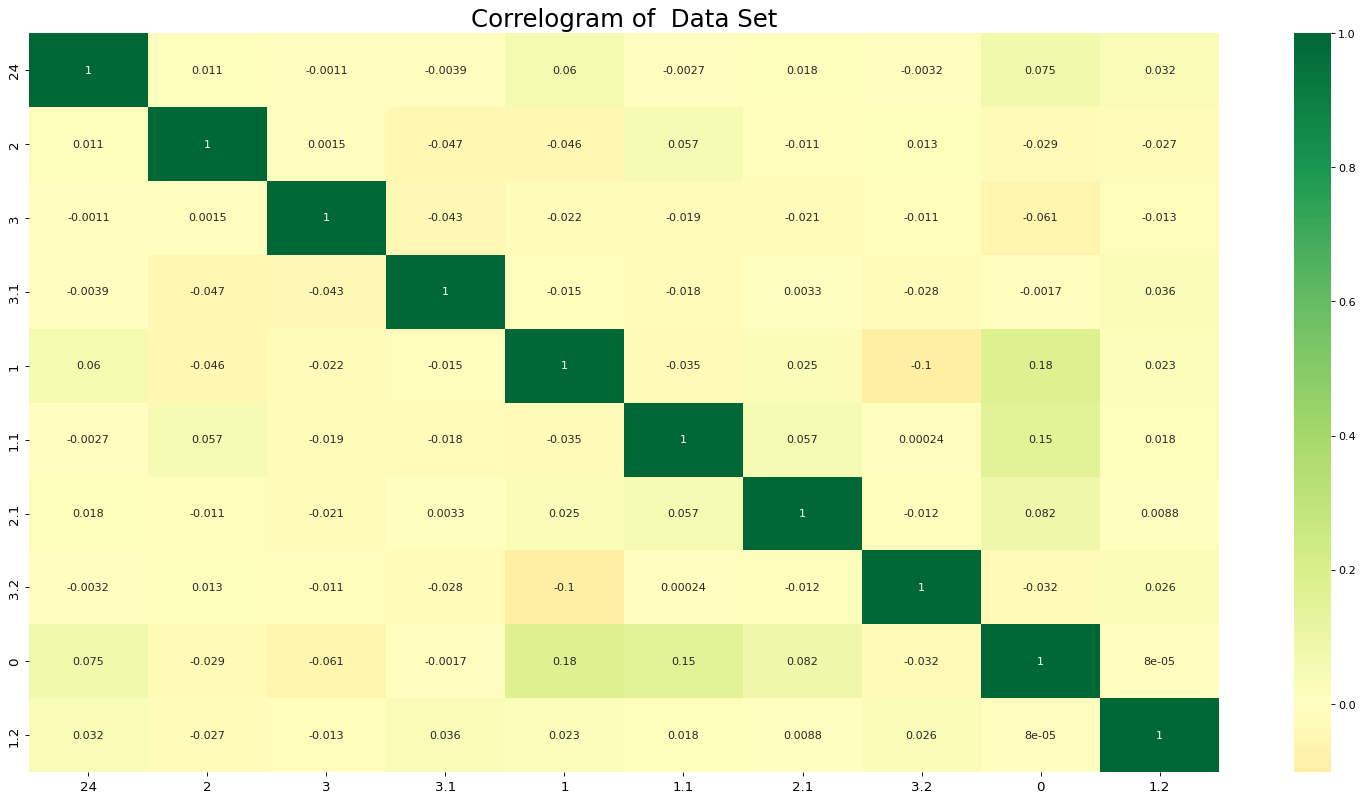

In [9]:
plot_corr(encoded_synt_data)

In [10]:
r1, r2, r3, r4 = evaluate(encoded_orig_data, 'CTGAN', 1472, '2', categorical_cols)

In [11]:
r1.mean()

0.5364130434782608

In [12]:
r2.mean()

0.29891304347826086

In [13]:
r3.mean()

0.3559782608695652

In [14]:
r4.mean()

0.3097826086956522

# TVAE

In [15]:
synt_data = generate_data(orig_data, "TVAE", 1472)

In [16]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(orig_data, synt_data, metadata_cmc)
report.get_details(property_name='Column Shapes')

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.22it/s]



Overall Quality Score: 82.55%

Properties:
Column Shapes: 88.34%
Column Pair Trends: 76.77%


,Column,Metric,Quality Score
0,24,KSComplement,0.794837
1,3.1,KSComplement,0.933424
2,2,TVComplement,0.955842
3,3,TVComplement,0.935462
4,1,TVComplement,0.850543
5,1.1,TVComplement,0.749321
6,2.1,TVComplement,0.832880
7,3.2,TVComplement,0.897418
8,0,TVComplement,0.947011
9,1.2,TVComplement,0.936821


In [17]:
encoded_orig_data = encode_columns(orig_data, categorical_cols)
encoded_synt_data = encode_columns(synt_data, categorical_cols)

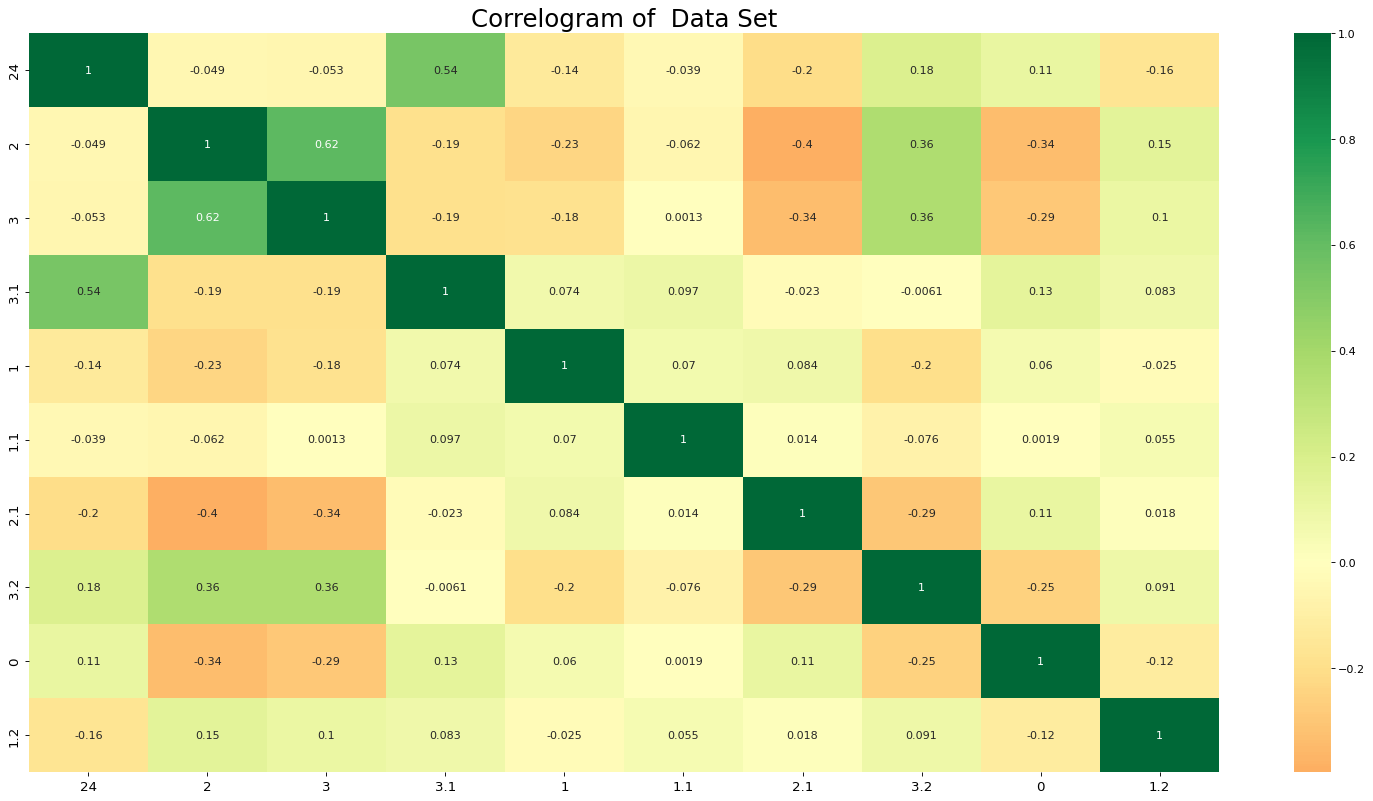

In [18]:
plot_corr(encoded_orig_data)

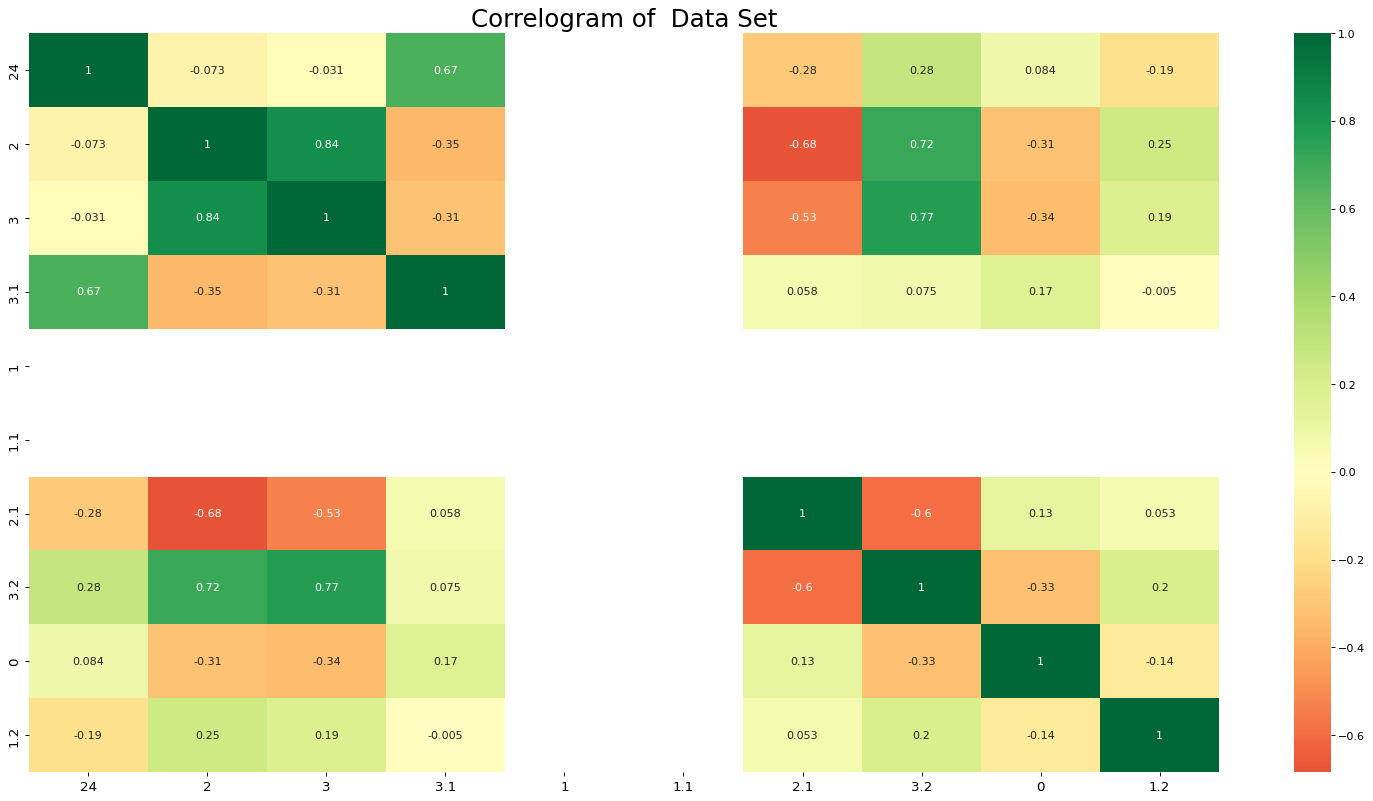

In [19]:
plot_corr(encoded_synt_data)

In [20]:
r1, r2, r3, r4 = evaluate(encoded_orig_data, 'TVAE', 1472, '2', categorical_cols)

In [21]:
r1.mean()

0.525

In [22]:
r2.mean()

0.40489130434782605

In [23]:
r3.mean()

0.8157608695652174

In [24]:
r4.mean()

0.4766304347826088

# CopulaGAN

In [25]:
synt_data = generate_data(orig_data, "CopulaGan", 1472)

In [26]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(orig_data, synt_data, metadata_cmc)
report.get_details(property_name='Column Shapes')

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.36it/s]



Overall Quality Score: 81.23%

Properties:
Column Shapes: 85.03%
Column Pair Trends: 77.43%


,Column,Metric,Quality Score
0,24,KSComplement,0.729620
1,3.1,KSComplement,0.836277
2,2,TVComplement,0.861413
3,3,TVComplement,0.811821
4,1,TVComplement,0.803668
5,1.1,TVComplement,0.790761
6,2.1,TVComplement,0.938859
7,3.2,TVComplement,0.879076
8,0,TVComplement,0.987772
9,1.2,TVComplement,0.863451


In [27]:
encoded_orig_data = encode_columns(orig_data, categorical_cols)
encoded_synt_data = encode_columns(synt_data, categorical_cols)

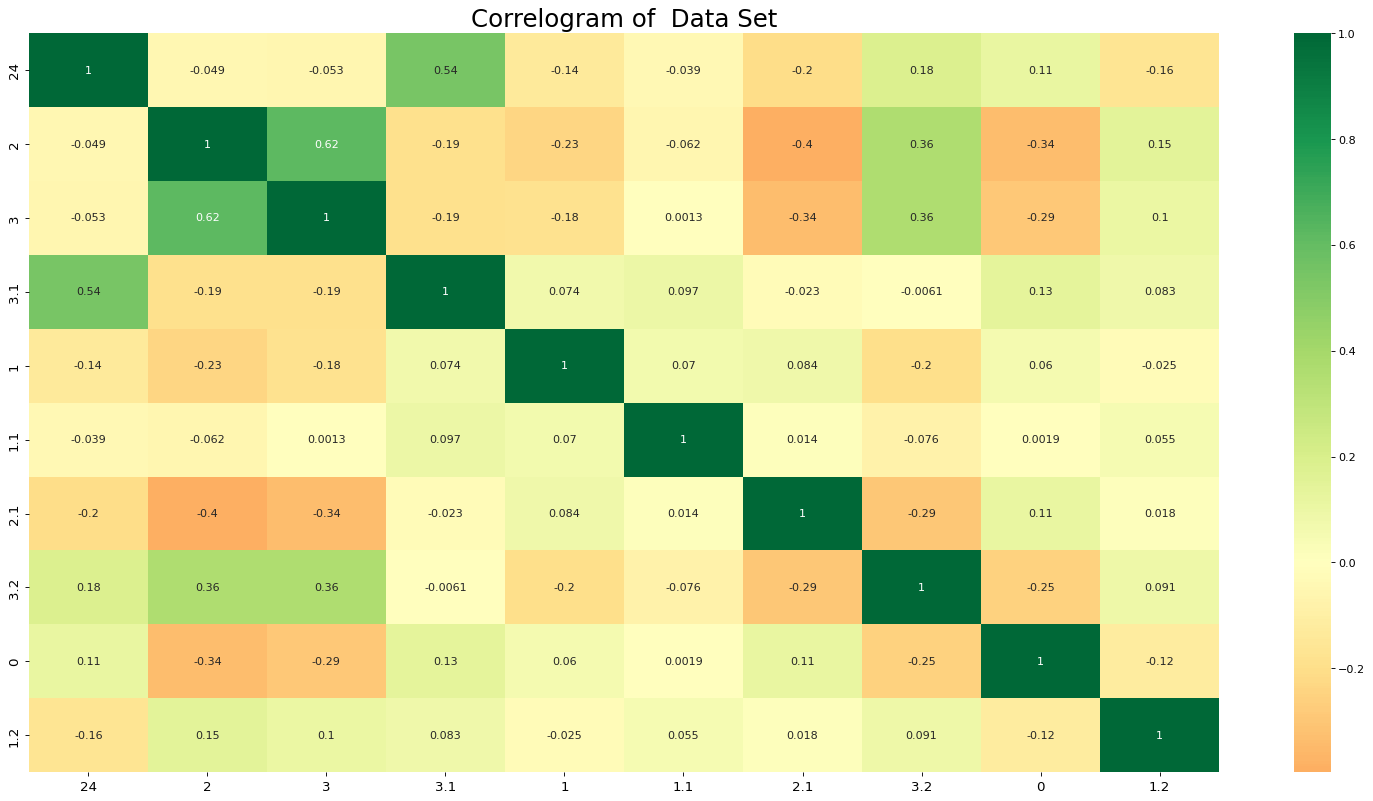

In [28]:
plot_corr(encoded_orig_data)

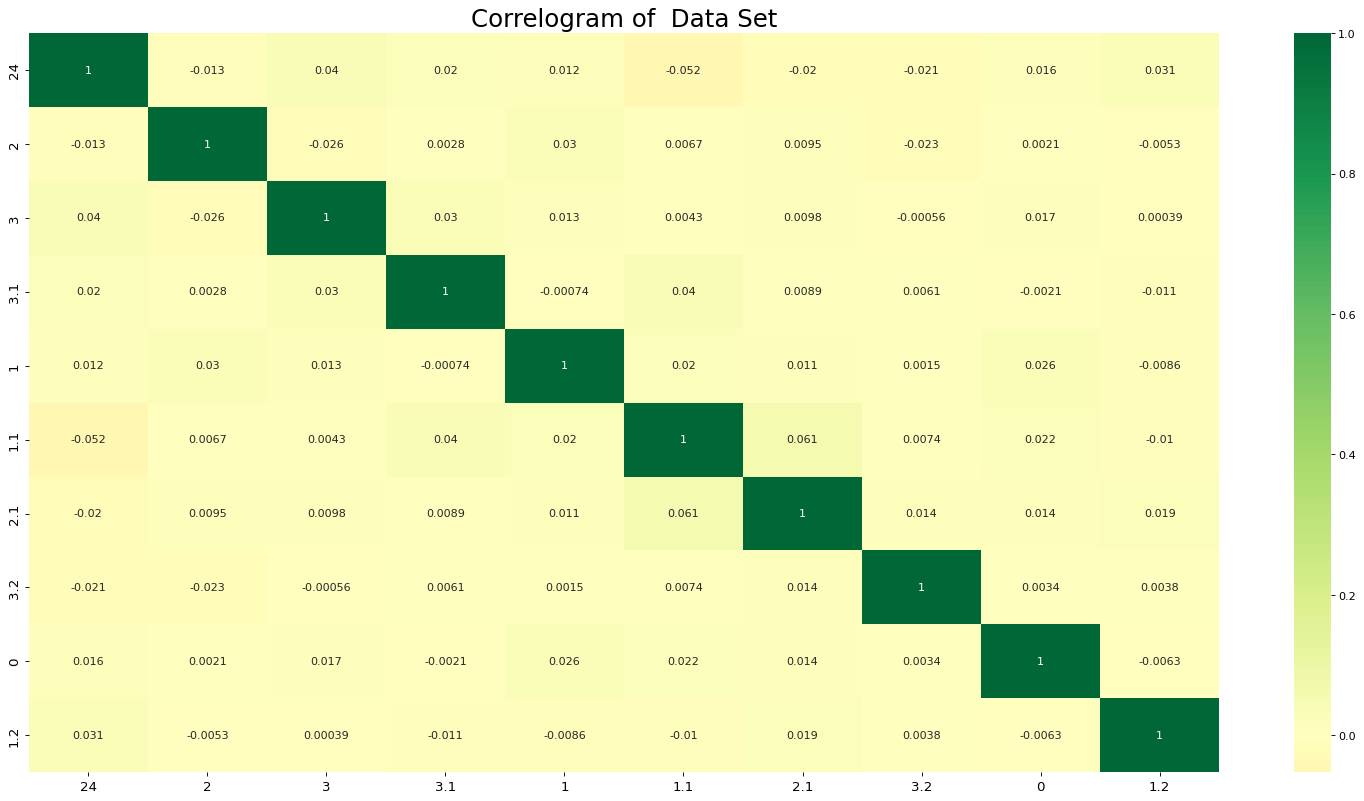

In [29]:
plot_corr(encoded_synt_data)

In [30]:
r1, r2, r3, r4 = evaluate(encoded_orig_data, 'CopulaGan', 1472, '2', categorical_cols)

In [31]:
r1.mean()

0.532608695652174

In [32]:
r2.mean()

0.30978260869565216

In [33]:
r3.mean()

0.3576086956521739

In [34]:
r4.mean()

0.2940217391304348

# GaussianCopula

In [35]:
synt_data = generate_data(orig_data, "GaussianCopula", 1472)

In [36]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(orig_data, synt_data, metadata_cmc)
report.get_details(property_name='Column Shapes')

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.89it/s]



Overall Quality Score: 82.05%

Properties:
Column Shapes: 86.01%
Column Pair Trends: 78.1%


,Column,Metric,Quality Score
0,24,KSComplement,0.961957
1,3.1,KSComplement,0.962636
2,2,TVComplement,0.824049
3,3,TVComplement,0.738451
4,1,TVComplement,0.942255
5,1.1,TVComplement,0.857337
6,2.1,TVComplement,0.807745
7,3.2,TVComplement,0.782609
8,0,TVComplement,0.997962
9,1.2,TVComplement,0.725543


In [37]:
encoded_orig_data = encode_columns(orig_data, categorical_cols)
encoded_synt_data = encode_columns(synt_data, categorical_cols)

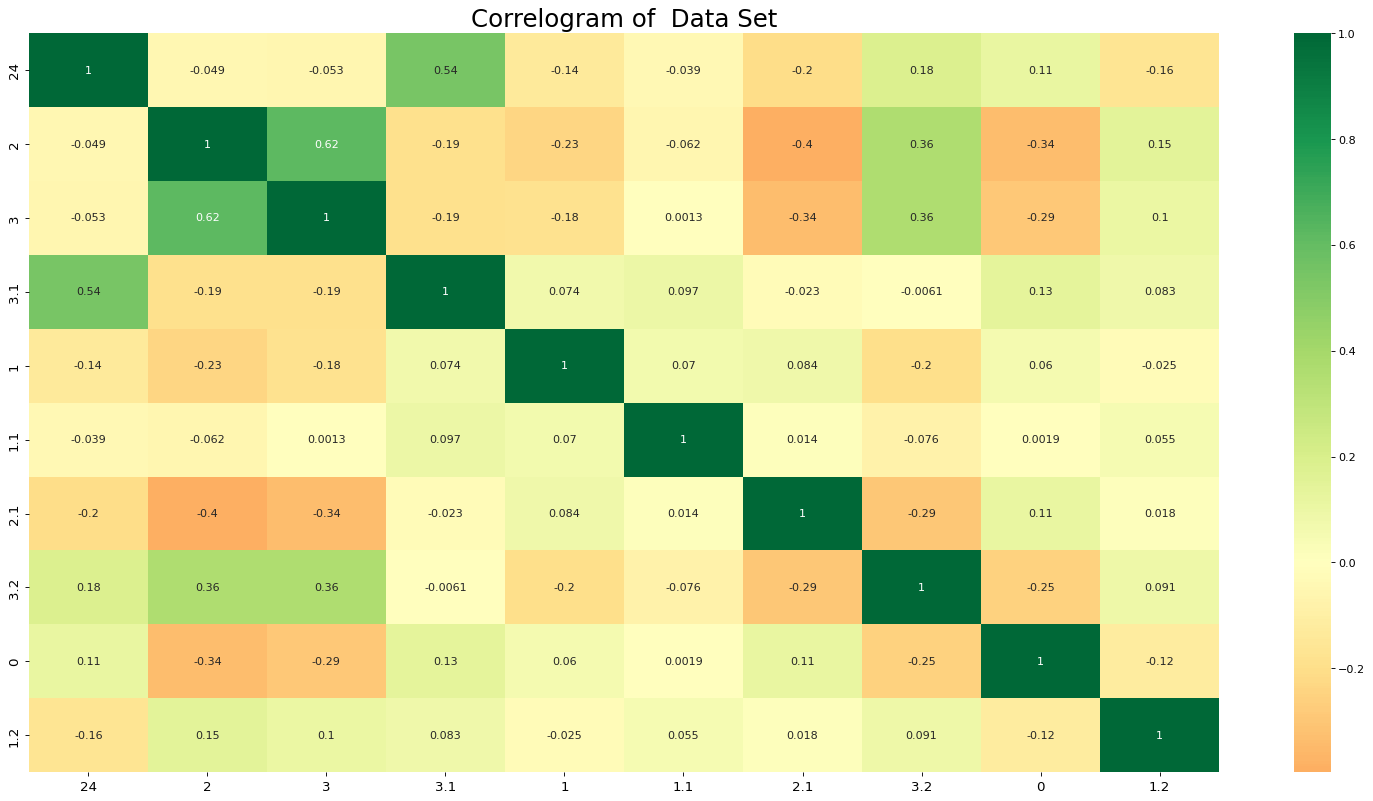

In [38]:
plot_corr(encoded_orig_data)

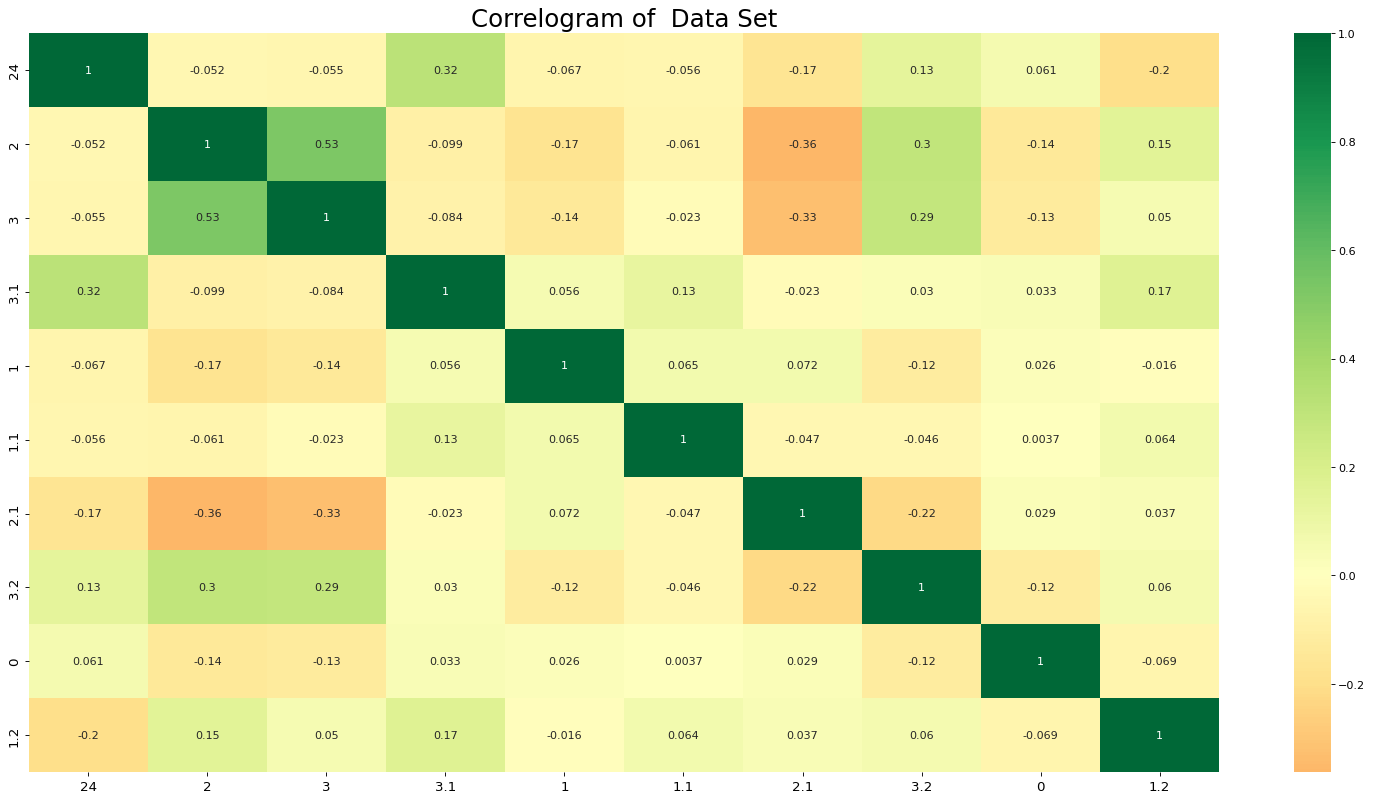

In [39]:
plot_corr(encoded_synt_data)

In [40]:
r1, r2, r3, r4 = evaluate(encoded_orig_data, 'GaussianCopula', 1472, '2', categorical_cols)

In [41]:
r1.mean()

0.5211956521739131

In [42]:
r2.mean()

0.42934782608695643

In [43]:
r3.mean()

0.44184782608695655

In [44]:
r4.mean()

0.4559782608695652